# statement
We have an Ecommerce Customers data of a company and The company is trying to decide whether to focus their efforts on their mobile app experience or their website.



In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler

In [41]:
cd C:\Users\HP-USER\Downloads

C:\Users\HP-USER\Downloads


# EDA

dataset=pd.read_csv('Ecommerce Customers.csv')
dataset.head()

In [42]:
dataset.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,472.000000,472.000000,472.000000,472.000000,472.000000
mean,33.038834,12.065351,37.069691,3.557382,500.985401
std,0.945115,0.957428,0.996274,0.877649,68.563830
min,30.393185,9.477778,34.476878,1.362674,319.928870
25%,32.341822,11.393568,36.365194,2.971614,449.036063
50%,33.078224,11.983231,37.075583,3.536463,501.165832
75%,33.700522,12.759760,37.716432,4.118402,548.339872
max,35.630854,14.715388,39.672591,5.840506,689.787604


In [43]:
dataset.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

###### As there are no null values we can continue with outliers detection

In [44]:
dataset.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

###### Box plot

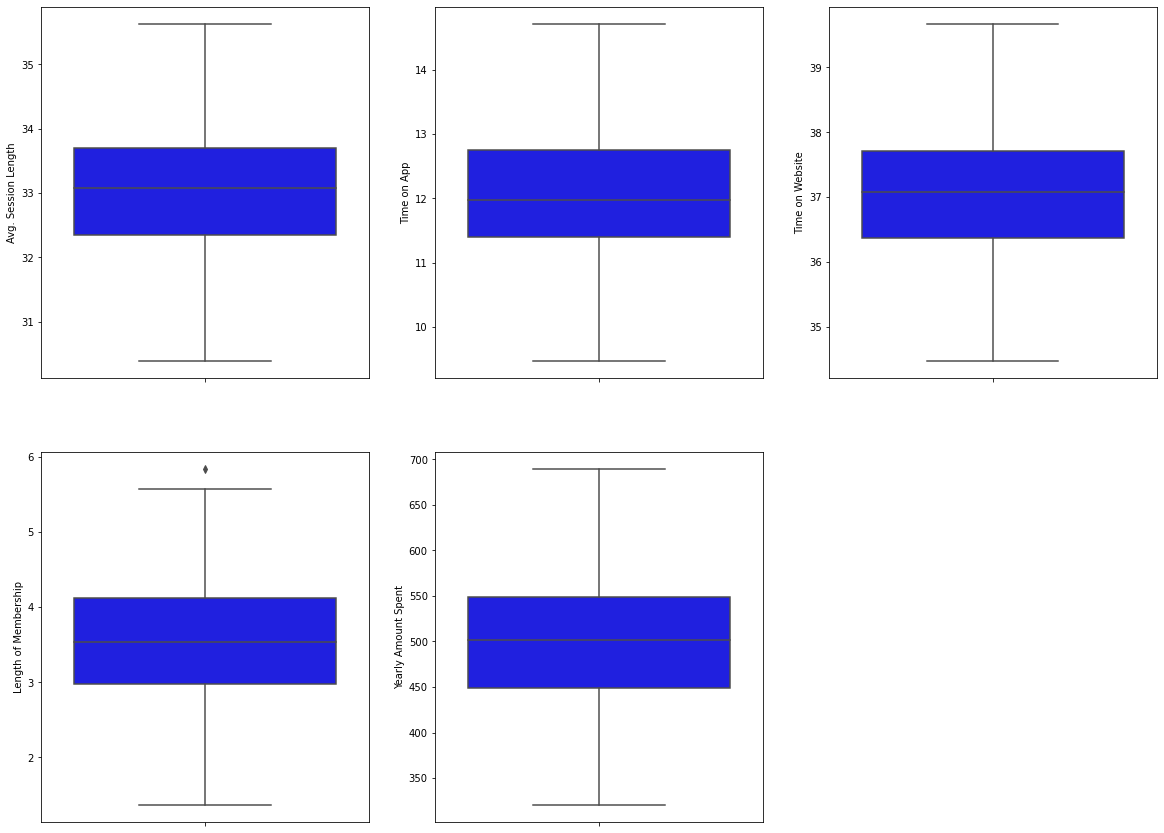

In [45]:
fig, axes = plt.subplots(2, 3,figsize=(20, 15))
sns.boxplot(y=dataset["Avg. Session Length"],color="blue", ax=axes[0,0])
sns.boxplot(y=dataset["Time on App"],color="blue", ax=axes[0,1])
sns.boxplot(y=dataset["Time on Website"],color="blue", ax=axes[0,2])
sns.boxplot(y=dataset["Length of Membership"],color="blue", ax=axes[1,0])
sns.boxplot(y=dataset["Yearly Amount Spent"],color="blue", ax=axes[1,1])
fig.delaxes(axes.flatten()[5])

###### Outliers function

In [46]:
def outliers_detector(data,features):
    outliers = []
    for i in features:
      Q1 = data[i].quantile(0.25)
      Q2 = data[i].quantile(0.5)
      Q3 = data[i].quantile(0.75)
      iqr = Q3 - Q1
      mini = Q1 - 1.5 * iqr
      maxi = Q3 + 1.5 * iqr
      print(f"mini,{mini},maxi,{maxi},Q1,{Q1},medain,{Q2},Q3,{Q3},irq,{iqr},{i}")
      outliers.extend(list(data[i].index[(data[i] > maxi) | (data[i] < mini)]))
    return outliers

ind = outliers_detector(dataset.iloc[:,3:],list(dataset.columns)[3:])
print(ind,len(dataset))

mini,30.303772420236818,maxi,35.7385713116527,Q1,32.34182200451777,medain,33.078224004585664,Q3,33.70052172737174,irq,1.3586997228539701,Avg. Session Length
mini,9.344281218626092,maxi,14.809046554619256,Q1,11.393568219623528,medain,11.983231258825267,Q3,12.75975955362182,irq,1.366191333998291,Time on App
mini,34.33833717325757,maxi,39.743289337215,Q1,36.36519423474161,medain,37.07558311153922,Q3,37.716432275730966,irq,1.351238040989358,Time on Website
mini,1.2514314712538557,maxi,5.838583796491722,Q1,2.9716135932180556,medain,3.5364631738880172,Q3,4.118401674527522,irq,1.1467880813094666,Length of Membership
mini,300.0803485084987,maxi,697.2955868432273,Q1,449.0360628840219,medain,501.16583209265485,Q3,548.339872467704,irq,99.30380958368215,Yearly Amount Spent
[420] 472


###### function to remove outliers

In [47]:
def outliers_remover(data,outliers):
  data.drop(set(outliers),inplace=True)
  return data
df = outliers_remover(dataset,ind)
print(len(df))

471


##### After removeing outliers

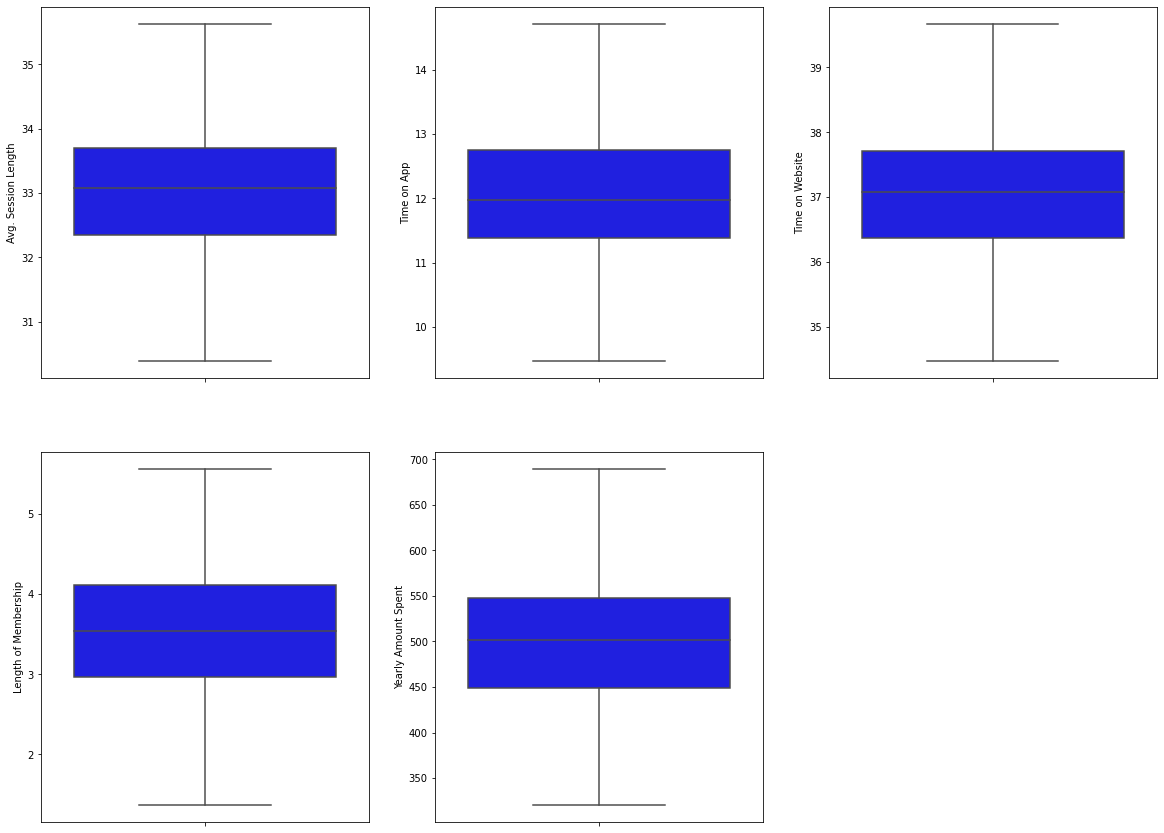

In [48]:
fig, axes = plt.subplots(2, 3,figsize=(20, 15))
sns.boxplot(y=df["Avg. Session Length"],color="blue", ax=axes[0,0])
sns.boxplot(y=df["Time on App"],color="blue", ax=axes[0,1])
sns.boxplot(y=df["Time on Website"],color="blue", ax=axes[0,2])
sns.boxplot(y=df["Length of Membership"],color="blue", ax=axes[1,0])
sns.boxplot(y=df["Yearly Amount Spent"],color="blue", ax=axes[1,1])
fig.delaxes(axes.flatten()[5])

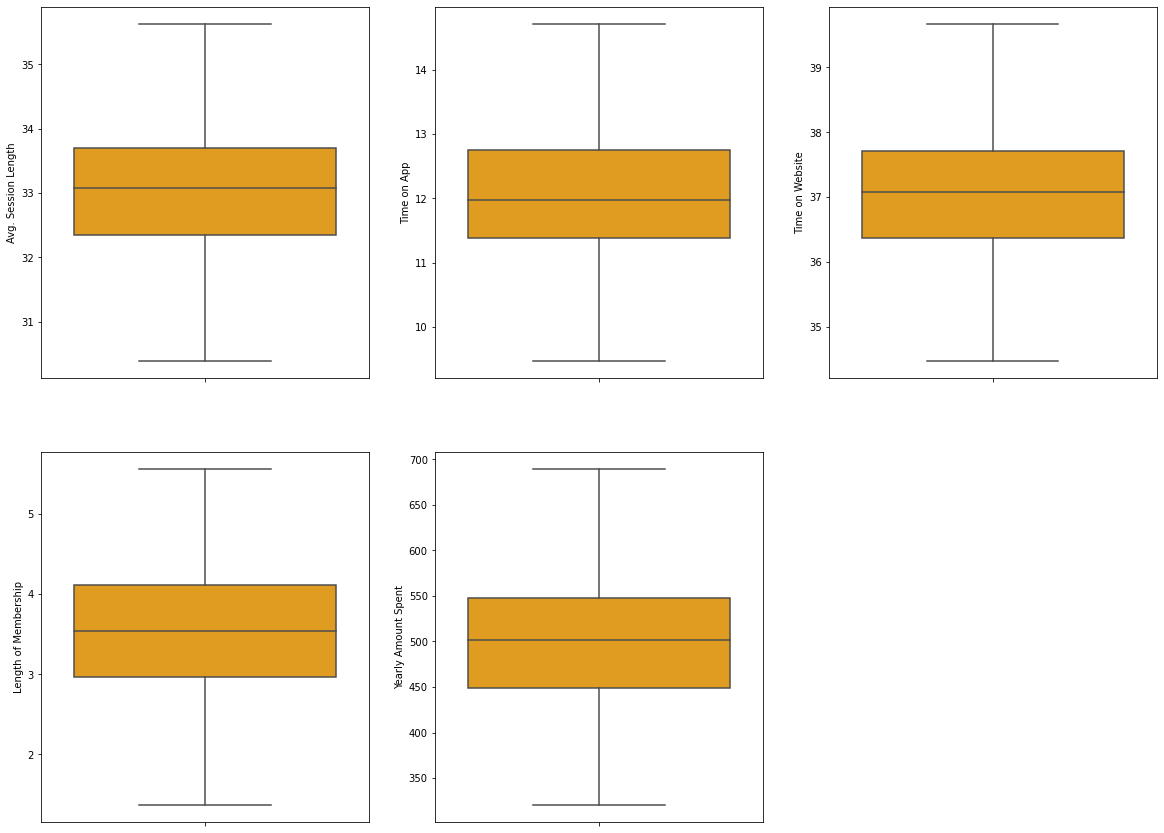

In [49]:
fig, axes = plt.subplots(2, 3,figsize=(20, 15))
sns.boxplot(y=dataset["Avg. Session Length"],color="orange", ax=axes[0,0])
sns.boxplot(y=dataset["Time on App"],color="orange", ax=axes[0,1])
sns.boxplot(y=dataset["Time on Website"],color="orange", ax=axes[0,2])
sns.boxplot(y=dataset["Length of Membership"],color="orange", ax=axes[1,0])
sns.boxplot(y=dataset["Yearly Amount Spent"],color="orange", ax=axes[1,1])
fig.delaxes(axes.flatten()[5])

In [50]:
ind = outliers_detector(df.iloc[:,3:],list(df.columns)[3:])
print(ind,len(df))
dataset = outliers_remover(dataset,ind)
print(len(dataset))

mini,30.301154946537338,maxi,35.74033582875131,Q1,32.34084777736758,medain,33.07773079450243,Q3,33.70064299792107,irq,1.3597952205534938,Avg. Session Length
mini,9.339292319293097,maxi,14.812984813994628,Q1,11.39192700480617,medain,11.982044994015611,Q3,12.760350128481553,irq,1.3684231236753828,Time on App
mini,34.33354549542097,maxi,39.74687810089174,Q1,36.36354522247251,medain,37.07437106706513,Q3,37.7168783738402,irq,1.3533331513676927,Time on Website
mini,1.25521456849871,maxi,5.83052453078559,Q1,2.97095580435629,medain,3.535802467873828,Q3,4.11478329492801,irq,1.14382749057172,Length of Membership
mini,300.51178423094916,maxi,696.4851764823898,Q1,449.0018063252394,medain,501.1224915036564,Q3,547.9951543880995,irq,98.99334806286015,Yearly Amount Spent
[] 471
471


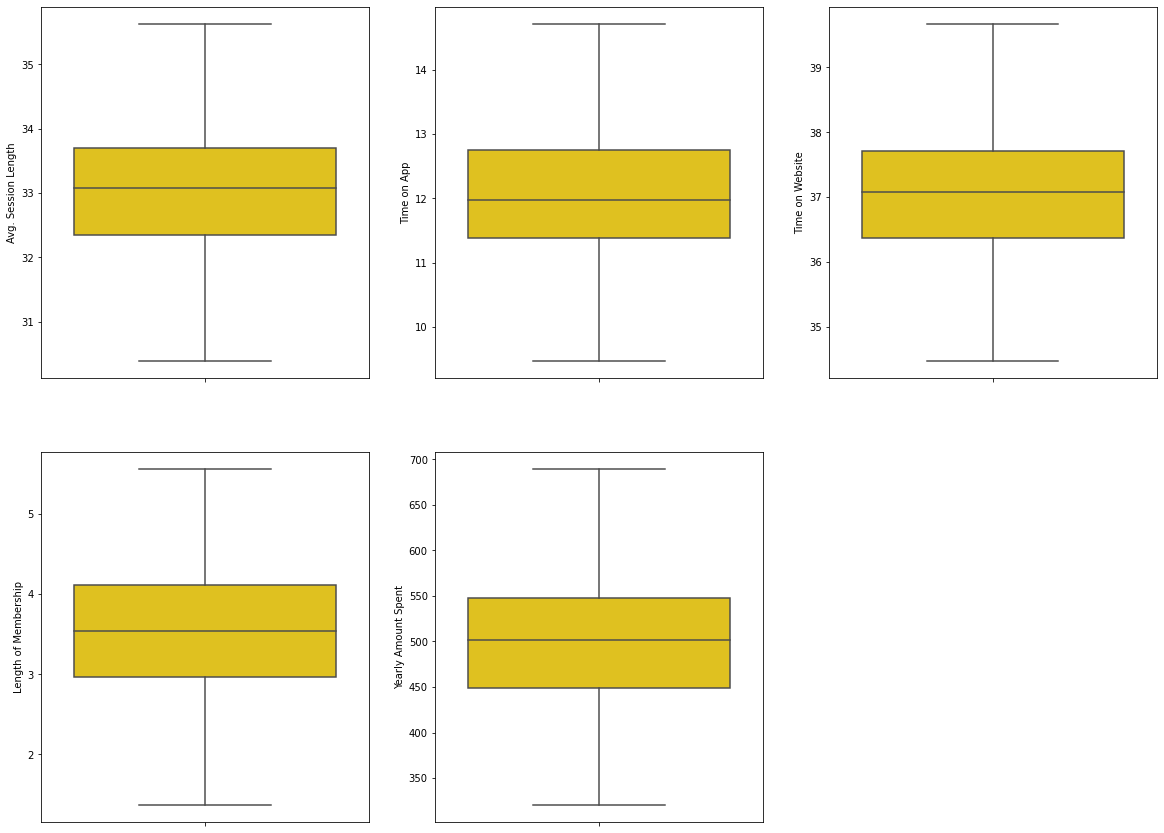

In [51]:
fig, axes = plt.subplots(2, 3,figsize=(20, 15))
sns.boxplot(y=dataset["Avg. Session Length"],color="gold", ax=axes[0,0])
sns.boxplot(y=dataset["Time on App"],color="gold", ax=axes[0,1])
sns.boxplot(y=dataset["Time on Website"],color="gold", ax=axes[0,2])
sns.boxplot(y=dataset["Length of Membership"],color="gold", ax=axes[1,0])
sns.boxplot(y=dataset["Yearly Amount Spent"],color="gold", ax=axes[1,1])
fig.delaxes(axes.flatten()[5])

##### correlation of datset

<AxesSubplot:>

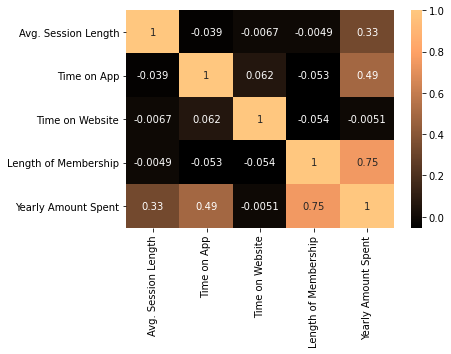

In [52]:
sns.heatmap(dataset.corr(),annot=True,cmap="copper")

## dist plot

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

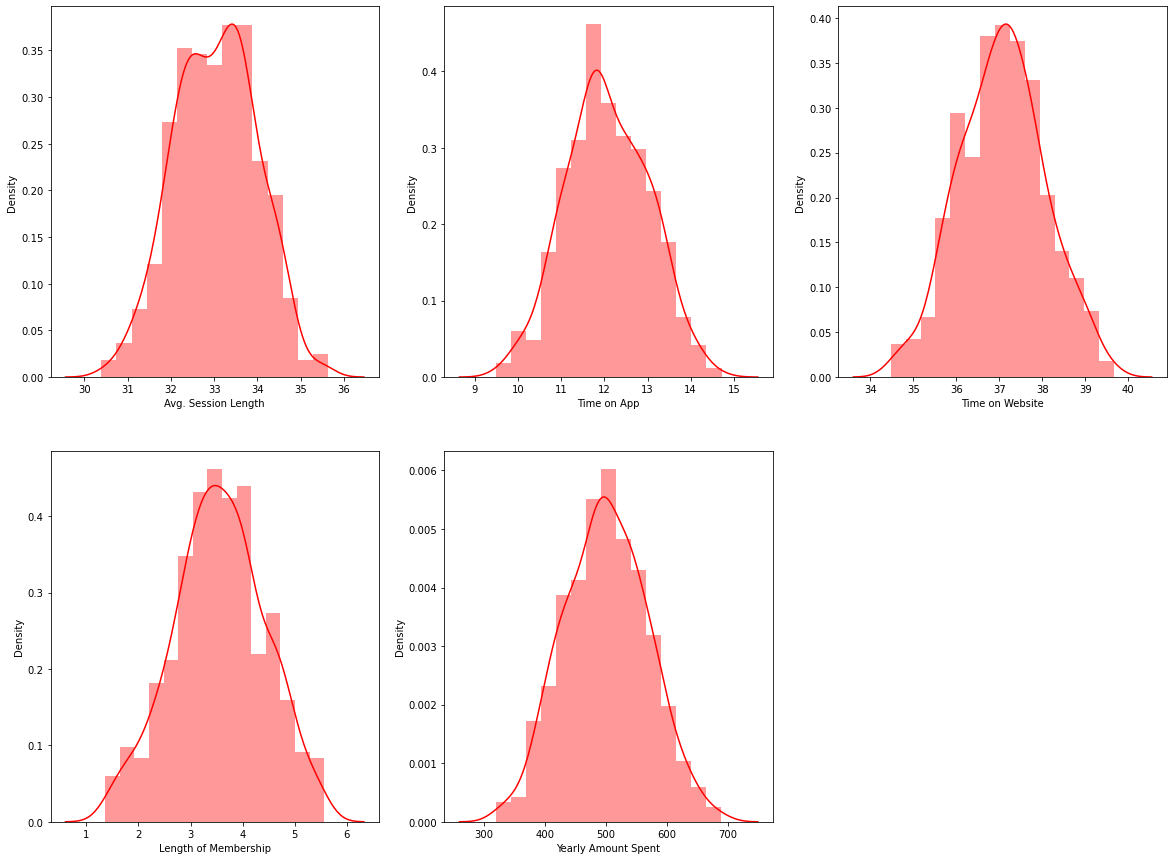

In [53]:
fig, axes = plt.subplots(2, 3,figsize=(20, 15))
sns.distplot(dataset["Avg. Session Length"],color="red", ax=axes[0,0])
sns.distplot(dataset["Time on App"],color="red", ax=axes[0,1])
sns.distplot(dataset["Time on Website"],color="red", ax=axes[0,2])
sns.distplot(dataset["Length of Membership"],color="red", ax=axes[1,0])
sns.distplot(dataset["Yearly Amount Spent"],color="red", ax=axes[1,1])
fig.delaxes(axes.flatten()[5])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

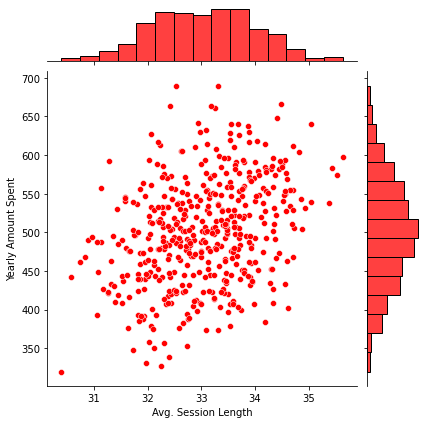

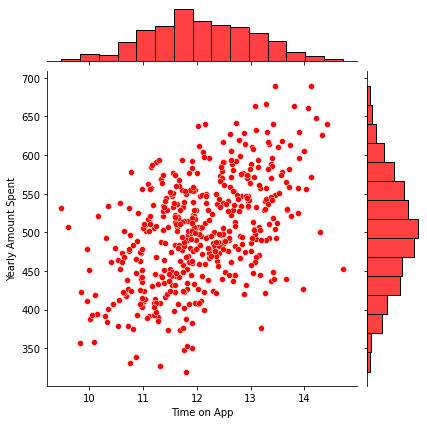

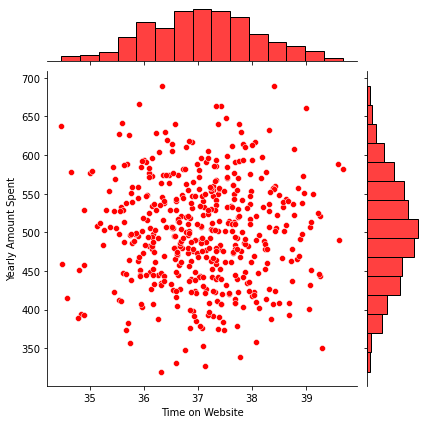

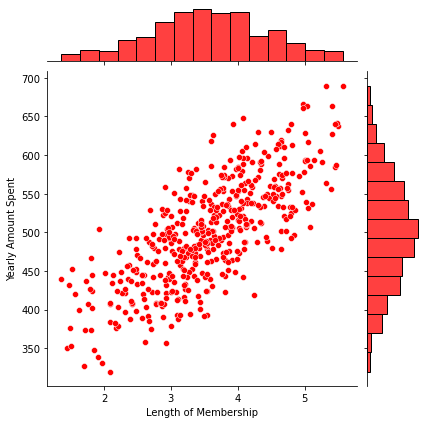

In [54]:
for i in df.columns[3:-1]:
  sns.jointplot(df[i],df.iloc[:,-1],color="red")

####  a pair plot to get more details regrading the dataset

In [61]:
dataset["more_or_less"] = dataset["Yearly Amount Spent"].apply(lambda x: "more" if x > 500 else("less"))

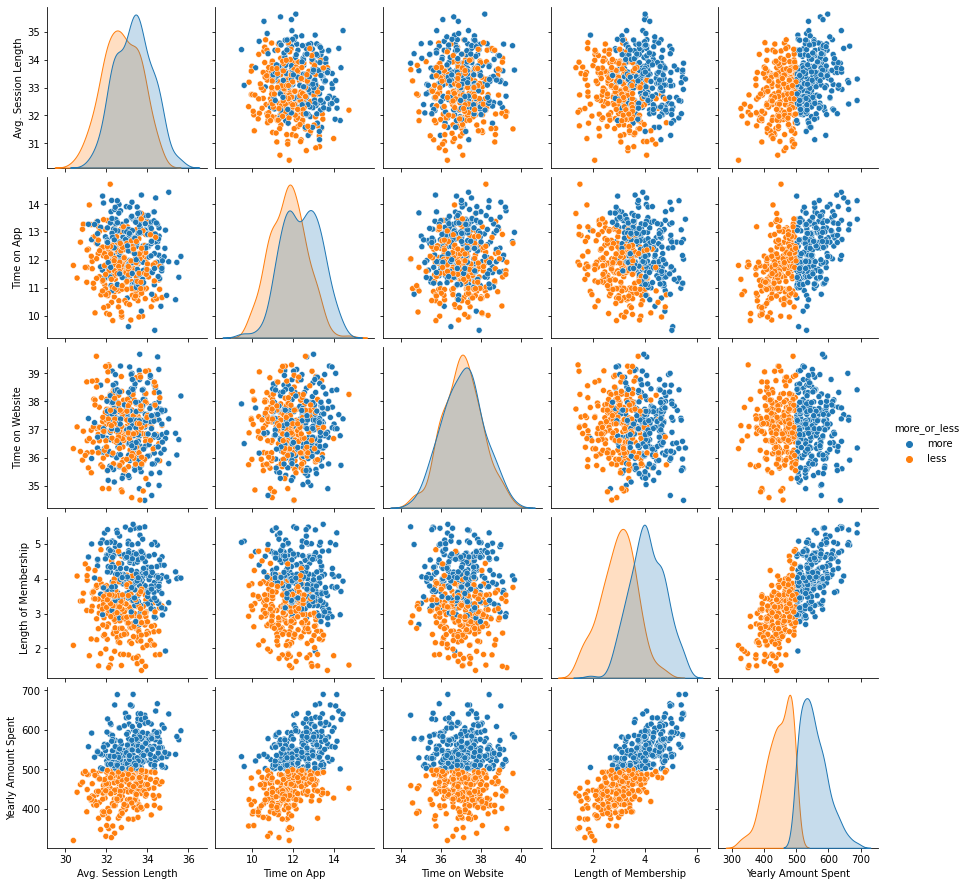

In [62]:
sns.pairplot(dataset,hue="more_or_less")

In [63]:
dataset.drop("more_or_less",axis=1,inplace=True)

# Buliding model


## import required modules

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

### Independent and dependent features

In [65]:
x= dataset.iloc[:,3:-1]
y=dataset.iloc[:,-1]

In [66]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns,index=x.index)

### spliting tarining and testing data

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=42)

#### Applying Linear regression model

In [68]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

##### Predection of test Values

In [69]:
pred = lr.predict(x_test)


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Yearly Amount Spent'>

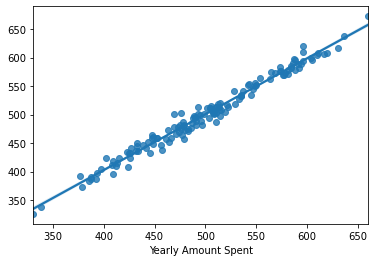

In [70]:
sns.regplot(y_test,pred)

In [71]:
mse = mean_squared_error(y_test,pred)
print(f" mean square error {mse}"," \n",f"squared mean square error {mse**0.5}")#,mean_square_error_mine(y_test,pred))
print(f" mean absolute error {mean_absolute_error(y_test,pred)}")

 mean square error 93.38234882388072  
 squared mean square error 9.66345429046367
 mean absolute error 7.788845013148878


In [72]:
model = sm.OLS(y,x).fit()
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.995
Model:                             OLS   Adj. R-squared (uncentered):              0.995
Method:                  Least Squares   F-statistic:                          2.178e+04
Date:                 Tue, 03 Jan 2023   Prob (F-statistic):                        0.00
Time:                         23:07:22   Log-Likelihood:                         -2367.7
No. Observations:                  471   AIC:                                      4743.
Df Residuals:                      467   BIC:                                      4760.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [73]:
"Traing Accuracy",lr.score(x_train,y_train)

('Traing Accuracy', 0.9780925862018889)

In [74]:
"Testing Accuracy",lr.score(x_test,y_test)

('Testing Accuracy', 0.979225157180264)

In [75]:
pd.DataFrame(lr.coef_,index=x_train.columns)

,0
Avg. Session Length,136.017684
Time on App,204.732241
Time on Website,2.330347
Length of Membership,256.959959


# Conclusion of project

## Regarding model predection

##### As our R square and abjusted R square scores is good, we can conclude that our model was good at predecting

## Interpretation

#### The company should focus on the mobile app.